# ORIE 5355/INFO 5370 HW 4: Experimentation

 - Name: Martin Sun
 - Net-id: ms2923
 - Date: 2021-11-02
 - Late days used for this assignment: 2
 - Total late days used (counting this assignment): 4
 - People with whom you discussed this assignment: 

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/YFrnPW63HsmrTZL38 and include the survey completion code below.

### Question 0 [2 points]
<font color='blue'> Survey completion code: hw4_2021dfg

# Conceptual component [6 points]

### Personal reflection

<font color='blue'> Think back to a time that you wanted to evaluate an idea or product. If you have not had such an idea before, you may answer these questions about an article in the news that reported such a feature, or a feature that you think might be in deployment at a company or organization with which you interact (for example, Amazon, Google, Facebook, etc). 

<font color='blue'> Briefly summarize the scenario in no more than two sentences. 

Google Pixel phones added the "night sight" feature to their camera software a few years ago. This was designed to offer extreme image quality improvement for photos in low light conditions.

<font color='blue'> What was the objective that you cared about/wanted to optimize with the product/idea? What was the measurement that you could feasibly measure during the experimental period? In what ways did the measurement not match the objective you cared about? Answer in no more than 3 sentences.  

The objective is to increase user value generated from the Pixel camera suite. To measure this, I'm guessing that Google implemented some beta trials, where they deployed the feature internally and evaluated the quality of the photos in different conditions. However, the quality might not necessarily correlate completely with general user preference.

<font color='blue'> Did the setting have interference (such as due to a network setting, interference through a 2 sided marketplace or capacity constraints, etc.)? If so, how did it effect your experimental design and results? If your answer is no, why are you sure that such interference did not happen? Answer in no more than 3 sentences.  

I don't think this feature had much experimental interference because it was tested completely internally - the only variable would have been the quality of images. However, once it was deployed to the public, competition is a key factor that interferes with user perceived value. If a competitor developed a much better version of the same feature, night sight would not bring in as much value.

<font color='blue'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

I would have altered the metric to be relative to competition, rather than absolute quality. Thus, the experimentation would be evaluating performance in the market. Additionally, I would cluster the testing groups by selecting users with the objective of keeping the proportion of experienced/frequent camera users representative in the testing group.

# Programming component

## Helper code

In [2]:
import numpy as np
import pandas as pd
import os, sys, math
import matplotlib.pyplot as plt

In [3]:
df_headlines = pd.read_csv('headline-experiment-heds.csv')
df = pd.read_csv('headline-experiment-impressions.csv')

In [4]:
for x in df_headlines.hed:
    print(x)

She's Not Just Destined For Greatness, She's Destined To Do Great Things For Women
This Young Woman Just Took Silicon Valley By Storm And She's Not Stopping There
Feminism 101: This Girl Is Going Places And She's Taking Other Girls With Her 
Remember When Math Was "Too Hard" For The Ladies? Not So Much.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14950 entries, 0 to 14949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hed     14950 non-null  int64
 1   click   14950 non-null  int64
dtypes: int64(2)
memory usage: 233.7 KB


In [6]:
df.hed.value_counts()

3    3763
1    3756
4    3737
2    3694
Name: hed, dtype: int64

In [7]:
df.groupby('hed')['click'].mean()

hed
1    0.010650
2    0.006497
3    0.010098
4    0.004549
Name: click, dtype: float64

df_headlines has a list of 4 headlines for the same article from Upworthy. df is a dataframe where each row represents a user. `hed` indicates which headline was shown to the user, and `click` is a binary indicator for whether the user clicked on the headline. A `1` represents a click, and so, for example, headline 2 was clicked on 0.6\% of the time. Each headline was shown to about 3700 users.

I recommend reading the following post: https://towardsdatascience.com/ab-testing-with-python-e5964dd66143

In this homework, we will only be working with the first two headlines:

In [8]:
df = df.query('hed==1 or hed==2')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7450 entries, 1 to 14949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hed     7450 non-null   int64
 1   click   7450 non-null   int64
dtypes: int64(2)
memory usage: 174.6 KB


# Problem 1: Simple A/B tests, and dependence on sample size

## Problem 1a: Simple A/B testing

First, what do the results look like if we use all the data?

Here, you will want to use the functions under "4. Testing the hypothesis" in the above blog post. In particular, you will want to test the "1 sided" hypothesis that headline 1 is better than headline 2. (In statsmodels.stats.proportion.proportions_ztest, use alternative='larger', and put headline 1 first in the data.)

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html


<font color='blue'> If you use all the data (all the entries in the dataframe), what is the mean click through rate for each headline?

In [10]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
hed1 = df.loc[df.hed == 1]
hed2 = df.loc[df.hed == 2]
print("first headline: " + str(hed1.click.mean()))
print("second headline: " + str(hed2.click.mean()))

first headline: 0.010649627263045794
second headline: 0.006497022198159177


<font color='blue'> If you use all the data, what is the p-value for the hypothesis that the first headline is better than the second headline?

In [11]:
successes = [hed1.click.sum(), hed2.click.sum()]
nobs = [hed1.click.count(), hed2.click.count()]

z_stat, p_val = proportions_ztest(successes, nobs=nobs, alternative='larger')
print("p value = " + str(p_val))

p value = 0.026077716204709694


<font color='blue'> If you use all the data, what are the confidence intervals for the click through rates for each headline?

In [12]:
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)
print(f'confidence interval 95% for control group: [{lower_con:.4f}, {upper_con:.4f}]')
print(f'confidence interval 95% for treatment group: [{lower_treat:.4f}, {upper_treat:.4f}]')

confidence interval 95% for control group: [0.0074, 0.0139]
confidence interval 95% for treatment group: [0.0039, 0.0091]


<font color='blue'> Interpret the above, in no more than 3 sentences

The p value being less than 5% tells us that the null hypothesis is invalid. Thus, the observation that the first headline is better than the second headline is statistically significant. The confidence intervals tells us within 95% confidence where our estimate for the actual click rate lies.

## Problem 1b: Experimentation with lower sample sizes

Now, we'll see how often we would make the "wrong" decision if we instead had run an experiment with a lower sample size. We do this via a method called "bootstrapping" -- we 're-sample' from the data that we actually saw, in order to estimate what would have happened via counter-factual experiments.  

<font color='blue'> Complete the following function, which does the following: it simulates 1000 fake experiments; each fake experiment, we sample `overall_sample_size` users and pretend that those users made up the experiment. 
    
<font color='blue'> We want to store:
    
- the distribution of click-through-rate estimates for each headline (we do this for you)

- the fraction of experiments in which headline 1 was found to be better than headline 2

In [30]:
def get_estimates_from_bootstrapping(df, overall_sample_size = 100):
    estimates = {hed: [] for hed in df.hed.unique()} # for each headline, store the mean estimates
    number_of_headlines_1_better_than_2 = 0
    for _ in range(1000): # simulate 1000 fake experiments ("bootstrapping")
        df_sample = df.sample(overall_sample_size)
        means = df_sample.groupby('hed')['click'].mean()
        for en, mean in enumerate(means):
            estimates[en+1].append(mean)
        if estimates[1][_] > estimates[2][_]:
            number_of_headlines_1_better_than_2 += 1
    
    return estimates, number_of_headlines_1_better_than_2/1000
    

In [32]:
estimates, test = get_estimates_from_bootstrapping(df)
test


0.352

<font color='blue'> For each of overall_sample_size in [100, 1000, 5000] plot a histogram of the estimates for each headline. You should have 3 plots, each plot corresponding to 1 sample size number and containing 2 histograms, 1 for each headline.


In [58]:
import seaborn as sns
sns.set_theme()
sample_sizes = [100, 1000, 5000]
histograms = {}
test = {}
for overall_sample_size in sample_sizes:
    histograms[overall_sample_size], test[overall_sample_size] = get_estimates_from_bootstrapping(df, overall_sample_size)
    

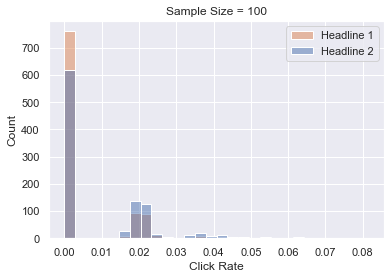

In [55]:
sns.histplot([histograms[100][1],histograms[100][2]])
plt.legend(['Headline 1', 'Headline 2'])
plt.title('Sample Size = 100')
plt.xlabel('Click Rate');

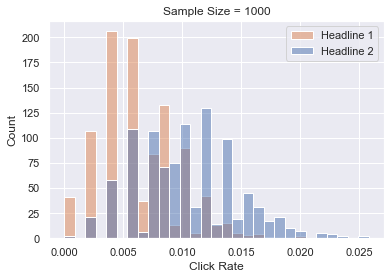

In [56]:
sns.histplot([histograms[1000][1],histograms[1000][2]])
plt.legend(['Headline 1', 'Headline 2'])
plt.title('Sample Size = 1000')
plt.xlabel('Click Rate');

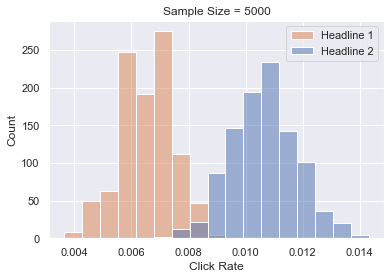

In [57]:
sns.histplot([histograms[5000][1],histograms[5000][2]])
plt.legend(['Headline 1', 'Headline 2'])
plt.title('Sample Size = 5000')
plt.xlabel('Click Rate');

In [66]:
sample_size_numbers = list(range(100, 6000, 500))

<font color='blue'> For each of overall_sample_size in sample_size_numbers, get the fraction of experiments in which headline 1 was found to be better than headline 2. Plot a line plot where the X axis is the sample size, and the Y axis is the fraction of times. Note that this code might take a minute or so to run. Note: your line plot should be increasing in the sample size (Why?)

In [71]:
test = np.zeros([len(sample_size_numbers),1])
for iteration in range(len(sample_size_numbers)):
    e, test[iteration] = get_estimates_from_bootstrapping(df,sample_size_numbers[iteration])

c:\users\marti\pycharmprojects\uncertainty-projects\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


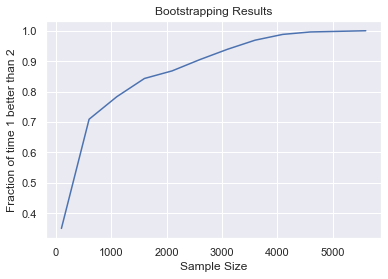

In [90]:
sns.lineplot(sample_size_numbers, test.reshape(1,-1)[0])
plt.title('Bootstrapping Results')
plt.ylabel('Fraction of time 1 better than 2')
plt.xlabel('Sample Size');

<font color='blue'> Intepret the above, in no more than 3 sentences.

We can see that bootstrapping with low sample size is detrimental to our intuition for how often headline 1 is better than headline 2. When the sample size is less than 5000, even though many experiments were performed, headline appears to perform much worse than expected. I think this could be due to the amount of zero click rate experiments in either headline, which is not factored in when we condition headline 1 being better than headline 2.

## Problem 2: Peeking (6 points)

Now, we'll illustrate the problem of "peeking" in experiments. Suppose you're a headline writer, and you personally wrote headline 2 and are now running the AB test. So, you have a maximum experiment budget of 2000 users. Each user comes in sequentially and is assigned either the first or second headline. Now, you also realize that experimentation is wasteful, and so you want to minimize the amount of time you're spending in the experiment.

So, you do the following: after each 20th user comes in and either clicks on the headline or doesn't, you run a 1-sided hypothesis test that headline 2 is better than headline 1 (similar to Problem 1a, but now testing headline 2 being better). If the p-value is less than $0.05$, then you declare victory: that headline 2 is statistically significantly better than headline 1, and so you stop the experiment. If the p-value is greater than $0.05$, you continue the experiment.

Now, we'll want to calculate: how often does the above procedure lead to you declaring victory, that headline 2 is statistically significantly better than headline 1?

Here, we will walk you through simulating the above procedure. As before, we will simulate 1000 fake experiments, to get a good estimate of what the above procedure behaves like.  

<font color='blue'> Finish the below code, to calculate number_of_headlines_2_better_than_1 using the above procedure

In [85]:
number_of_headlines_2_better_than_1 = 0
n_experiments = 0
for _ in range(1000): # simulate 1000 fake experiments
    df_sample = df.sample(2000)
    for number_users in range(20, 2001, 20):
        df_users_to_far = df_sample.iloc[0:number_users] #grab the first number_users users
        hed1 = df_users_to_far.loc[df_users_to_far.hed == 1]
        hed2 = df_users_to_far.loc[df_users_to_far.hed == 2]
        successes = [hed1.click.sum(), hed2.click.sum()]
        nobs = [hed1.click.count(), hed2.click.count()]
        if nobs[0] == 0 or nobs[1] == 0:
            _ -= 1
            break
        z_stat, p_val = proportions_ztest(successes, nobs=nobs, alternative='smaller')
        if p_val < 0.05:
            n_experiments += 1
            break
        #TODO: calculate p-value of experiment, the 1-sided hypothesis test that headline 2 is better than headline 1
        #TODO potentially end experiment. The "break" keyword in python might come in handy.
        # Note that you want to break the inner for loop but not the outer loop (think why). 
        # Note, you sometimes may get "unlucky", and all the first 20 users received the same headline. In that case, continue the experiment without checking the p-value

c:\users\marti\pycharmprojects\uncertainty-projects\venv\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [87]:
n_experiments/1000

0.065

<font color='blue'> What fraction of the time does the above procedure declare that headline 2 is better than headline 1?

It appears to be about 0.06 to 0.07. So 6% to 7% of the time, if we peek, we'll conclude with a p value of <0.05 that headline 2 is better than headline 1.

<font color='blue'> Interpret the above answer, in no more than 3 sentences. What went wrong?

Peeking is inflating the false positives from our prior estimate of about 2.6% to over 6%. By peeking, a significant fraction of the time, a seemingly statistically significant result appears to be the case when the reality is far from it. We saw from the first question that the null hypothesis is not valid with quite high certainty - varying sample size introduced high bias into the experimental results.